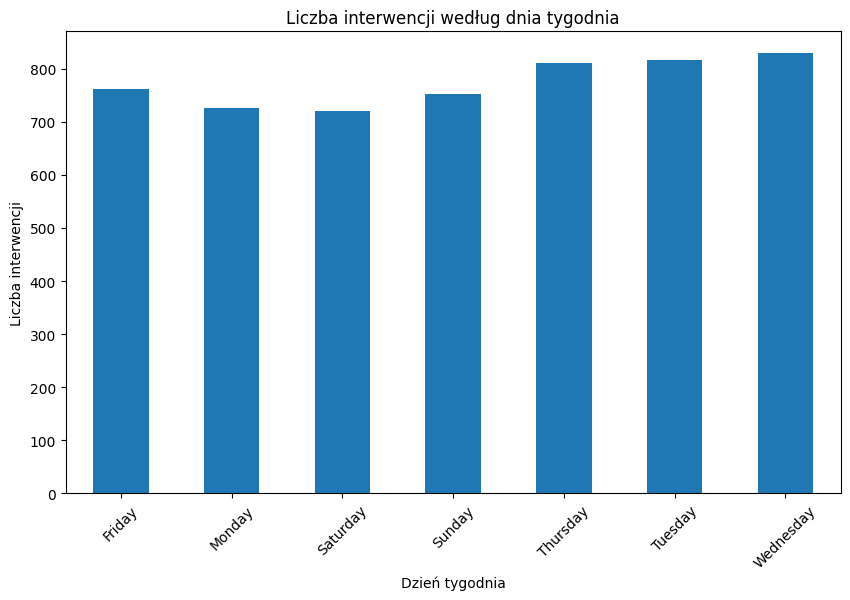

Największy odsetek choroby psychicznej jest dla rasy: W
     State_x Abbreviations incidents_per_1000_residents
0        NaN           NaN                          NaN
1        NaN           NaN                          NaN
2        NaN           NaN                          NaN
3        NaN           NaN                          NaN
4        NaN           NaN                          NaN
...      ...           ...                          ...
5411     NaN           NaN                          NaN
5412     NaN           NaN                          NaN
5413     NaN           NaN                          NaN
5414     NaN           NaN                          NaN
5415     NaN           NaN                          NaN

[5416 rows x 3 columns]


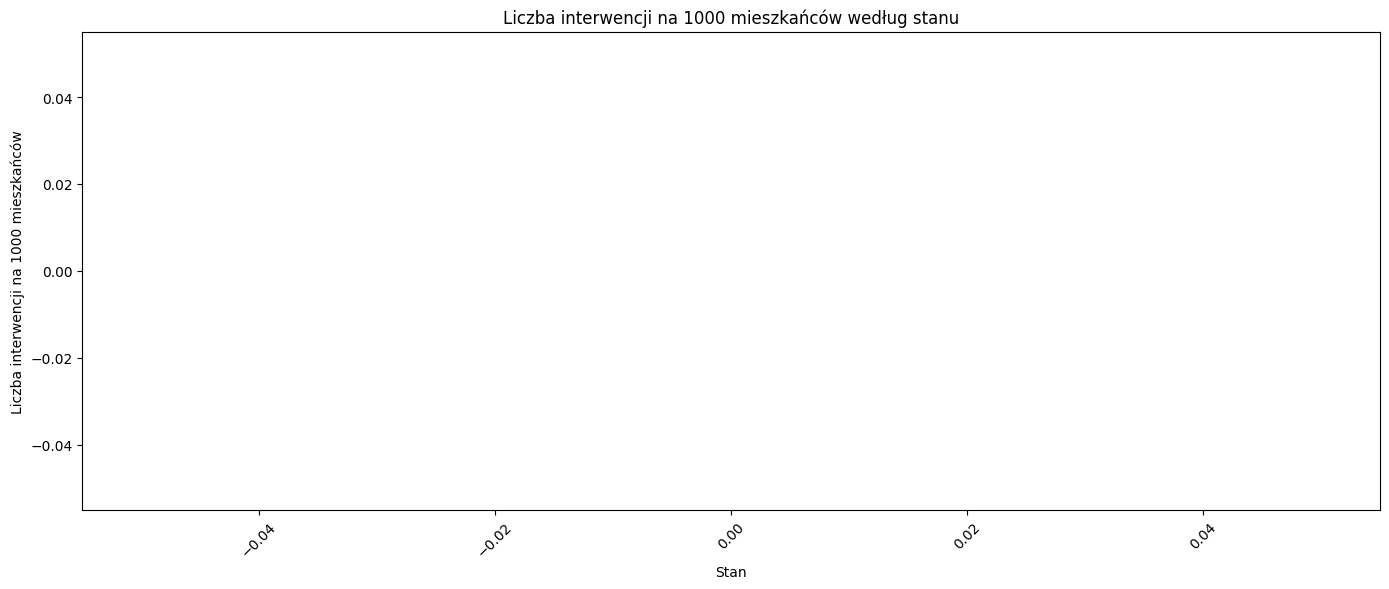

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z plików Excel
states_df = pd.read_excel('Stany.xlsx')
abbreviations_df = pd.read_excel('Skroty.xlsx')

# Wczytanie danych
df = pd.read_csv('fatal-police-shootings-data.csv')

# Połącz informacje o nazwach stanów i ich skrótach z istniejącym DataFrame
df = df.merge(states_df, how='left', left_on='state', right_on='State')
df = df.merge(abbreviations_df, how='left', left_on='state', right_on='State')

# Przekształcenie tabeli
summary_table = df.groupby(['race', 'signs_of_mental_illness']).size().unstack(fill_value=0)
summary_table['percentage_with_mental_illness'] = (summary_table[True] / (summary_table[True] + summary_table[False])) * 100
max_percentage_race = summary_table['percentage_with_mental_illness'].idxmax()

# Dodanie kolumny z dniem tygodnia
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

# Zliczenie interwencji według dnia tygodnia
interventions_by_day = df['day_of_week'].value_counts().sort_index()

# Tworzenie wykresu kolumnowego
plt.figure(figsize=(10, 6))
interventions_by_day.plot(kind='bar')
plt.title('Liczba interwencji według dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba interwencji')
plt.xticks(rotation=45)
plt.show()

print(f"Największy odsetek choroby psychicznej jest dla rasy: {max_percentage_race}")

# Zapisz DataFrame do pliku Excel
df.to_excel('fatal_police_shootings_data_with_states_info.xlsx', index=False)

# Oblicz liczbę interwencji na 1000 mieszkańców
df['incidents_per_1000_residents'] = (df['Population'] / 1000) / df.groupby('Abbreviations')['Abbreviations'].transform('count')

# Wyświetl wynik
print(df[['State_x', 'Abbreviations', 'incidents_per_1000_residents']])

# Tworzenie wykresu kolumnowego dla liczby interwencji na 1000 mieszkańców
plt.figure(figsize=(14, 6))  # Zwiększamy szerokość wykresu
plt.bar(df['State_x'], df['incidents_per_1000_residents'], color='skyblue')
plt.title('Liczba interwencji na 1000 mieszkańców według stanu')
plt.xlabel('Stan')
plt.ylabel('Liczba interwencji na 1000 mieszkańców')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
